In [25]:
import pandas as pd
import numpy as np

import nltk
import re
import os
import codecs
from sklearn import feature_extraction

In [26]:
data_spon = pd.read_csv("corpus_prep.csv")
data_prep = pd.read_csv("corpus_spon.csv")

In [27]:
data_spon_q = data_spon["question"]
data_prep_q = data_prep["question"]

In [28]:
len(data_spon_q)

445

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from nltk.corpus import stopwords
stopwords_fr = stopwords.words('french')
vectorizer = TfidfVectorizer(stop_words=stopwords_fr)
X = vectorizer.fit_transform(data_prep_q[50:75])

In [36]:
terms = vectorizer.get_feature_names_out()

In [48]:
print(terms)

['aimez' 'alliez' 'appel' 'bah' 'beaucoup' 'cherche' 'chose' 'choses'
 'classique' 'comment' 'content' 'coupé' 'différences' 'dire' 'déjà'
 'déplaisent' 'encre' 'enfin' 'entends' 'euh' 'exemple' 'fait'
 'familiales' 'grosses' 'hein' 'joue' 'k1' 'k3' 'k4' 'lesquelles'
 'lettres' 'là' 'moderne' 'mois' 'mot' 'moyenne' 'nature' 'oh' 'omelette'
 'orléans' 'oui' 'préparer' 'quelqu' 'quelque' 'quelquefois' 'relations'
 'satisfaits' 'savez' 'stylo' 'toujours' 'travail' 'vaut' 'voyez' 'ça'
 'ètes' 'écrire']


In [37]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [53]:
# linkage_matrix = ward(dist)
linkage_matrix = linkage(dist, 'average')

In [54]:
print(linkage_matrix.shape)
print(dist.shape)
print(terms.shape)

(24, 4)
(25, 25)
(56,)


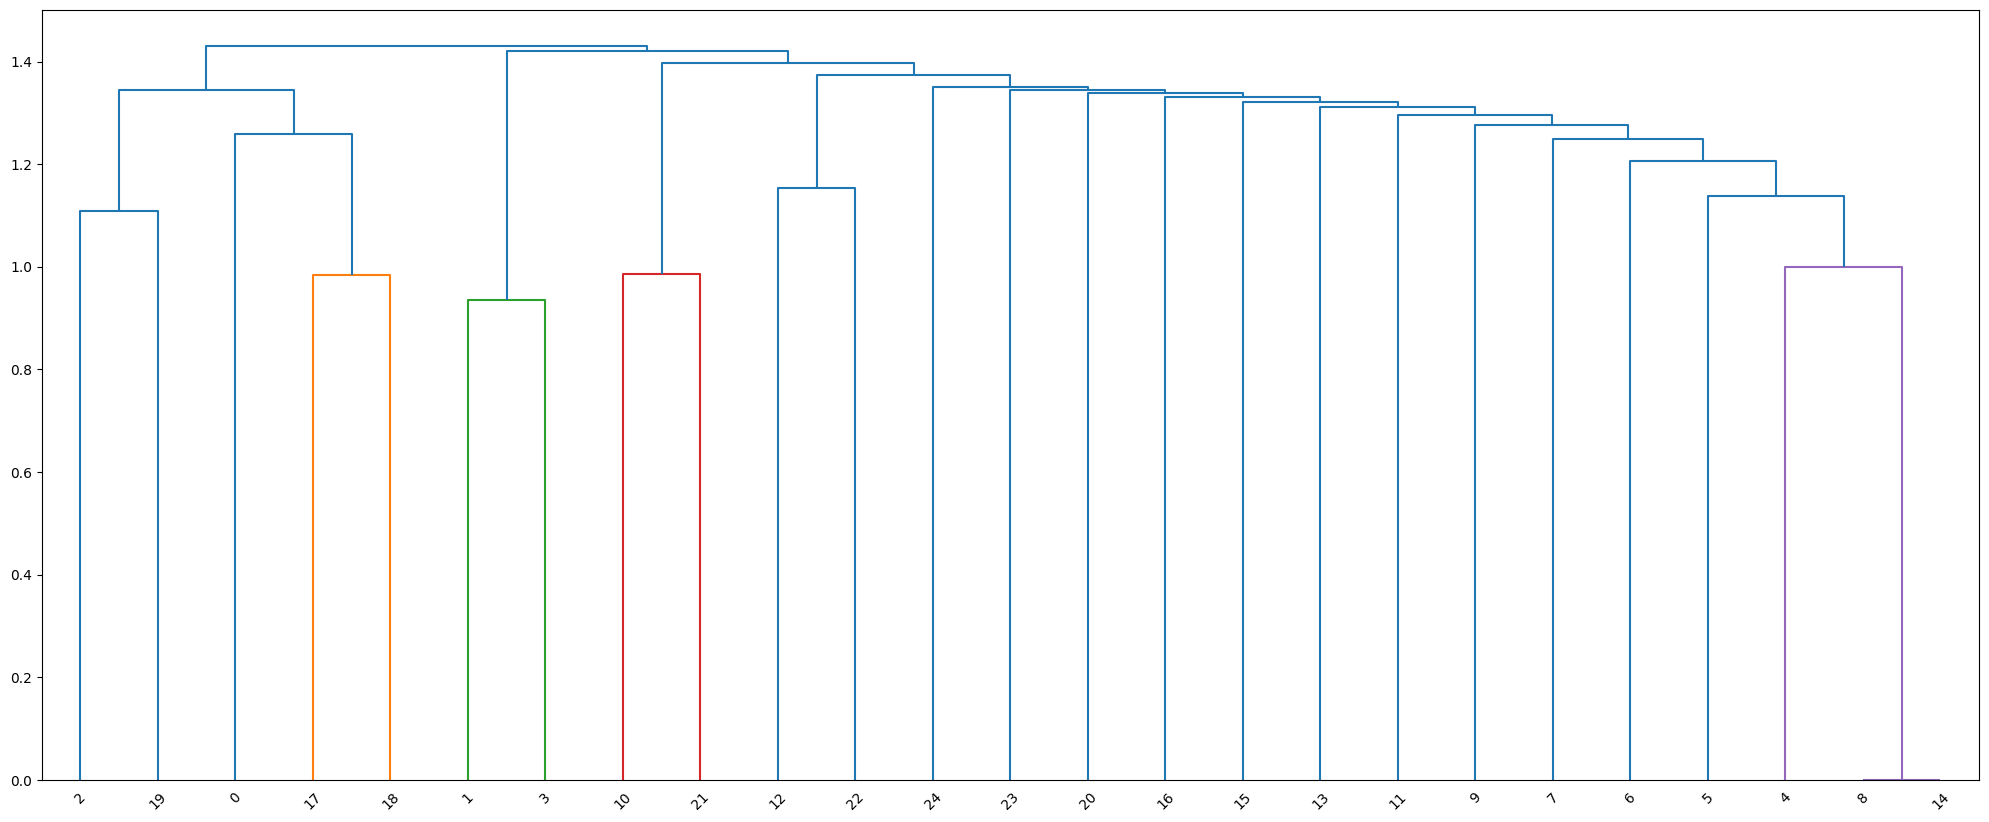

In [55]:
fig = plt.figure(figsize=(25,10))
dn = dendrogram(linkage_matrix)